In [1]:
# Clear Global Environment
rm(list = ls())

In [2]:
# Set working directory
getwd()
setwd("/Users/Lingyi/TAD/lab/Text-as-Data-Lab-Spr2018/W2_02-01-18")

[1] "/Users/Lingyi/TAD/lab/Text-as-Data-Lab-Spr2018/W2_02-01-18"

In [3]:
library("quanteda")

quanteda version 1.0.0
Using 3 of 4 threads for parallel computing

Attaching package: ‘quanteda’

The following object is masked from ‘jupyter:irkernel’:

    View

The following object is masked from ‘package:utils’:

    View



In [4]:
library("devtools")

In [5]:
library(quanteda.corpora)

In [6]:
# start with a short character vector
sampletxt <- "The police with their policing strategy instituted a policy of general 
iterations at the Data Science Institute."

In [8]:
# 2.1 Let's tokenize (break vector into individual words)
tokenized_text <- tokens(sampletxt)
#?tokens
tokenized_text

tokens from 1 document.
text1 :
 [1] "The"        "police"     "with"       "their"      "policing"  
 [6] "strategy"   "instituted" "a"          "policy"     "of"        
[11] "general"    "iterations" "at"         "the"        "Data"      
[16] "Science"    "Institute"  "."         


In [9]:
tokenized_text <- tokens(sampletxt, remove_punct = TRUE)
tokenized_text

tokens from 1 document.
text1 :
 [1] "The"        "police"     "with"       "their"      "policing"  
 [6] "strategy"   "instituted" "a"          "policy"     "of"        
[11] "general"    "iterations" "at"         "the"        "Data"      
[16] "Science"    "Institute" 


#### a type is a unique sequence of characters that are grouped together in some meaningful way. Mostly a word (for us), but might also be a word plus punctuation, or a number etc.
    e.g. ‘France’, ‘American Revolution’, ‘1981’

#### a token is a particular instance of type.
    e.g. “Dog eat dog world”, contains 3 types, but 4 tokens (for most purposes).

#### a term is a type that is part of the system’s ‘dictionary’ (i.e. what the quantitative analysis technique recognizes as a type to be recorded etc). Could be different from the tokens, but often closely related.
    e.g. stemmed word like ‘treasuri’, which doesn’t appear in the document itself.

In [10]:
# 2.2 Stemming examples
# SnowballC stemmer is based on the Porter stemmer 

stems <- tokens_wordstem(tokenized_text)
#?tokens_wordstem

In [11]:
# 2.3 Loading State of the Union corpus

data("data_corpus_sotu", package = "quanteda.corpora")

In [13]:
# ndoc identifies the number of documents in a corpus

ndocs <- ndoc(data_corpus_sotu)
ndocs

[1] 232

In [15]:
# Here, we grab the text of Obama's 2016 speech

last_speech_text <- data_corpus_sotu[ndocs - 2]
last_speech_text

Obama-2016 
"Thank you. Mr. Speaker, Mr. Vice President, Members of Congress, my fellow Americans: Tonight marks the eighth year that I've come here to report on the State of the Union. And for this final one, I'm going to try to make it a little shorter. I know some of you are antsy to get back to Iowa. ! I've been there. I'll be shaking hands afterwards if you want some tips. !\nNow, I understand that because it's an election season, expectations for what we will achieve this year are low. But, Mr. Speaker, I appreciate the constructive approach that you and other leaders took at the end of last year to pass a budget and make tax cuts permanent for working families. So I hope we can work together this year on some bipartisan priorities like criminal justice reform and helping people who are battling prescription drug abuse and heroin abuse. So, who knows, we might surprise the cynics again.\n\nBut tonight I want to go easy on the traditional list of proposals for the year ahead. Don't worry, I've got plenty- Take a vote. But the American people should know that with or without congressional action, ISIL will learn the same lessons as terrorists before them. If you doubt America's commitment-or mine-to see that justice is done, just ask Usama bin Laden. Ask the leader of Al Qaida in Yemen, who was taken out last year, or the perpetrator of the Benghazi attacks, who sits in a prison cell. When you come after Americans, we go after you. And it may take time, but we have long memories, and our reach has no limits.\n\nOur foreign policy has to be focused on the threat from ISIL and Al Qaida, but it can't stop there. For even without ISIL, even without Al Qaida, instability will continue for decades in many parts of the world: in the Middle East, in Afghanistan and parts of Pakistan, in parts of Central America, in Africa and Asia. Some of these places may become safe havens for new terrorist networks. Others will just fall victim to ethnic conflict or famine, feeding the next wave of refugees. The world will look to us to help solve these problems, and our answer needs to be more than tough talk or calls to carpet-bomb civilians. That may work as a TV sound bite, but it doesn't pass muster on the world stage.\n\nWe also can't try to take over and rebuild every country that falls into crisis, even if it's done with the best of intentions. That's not leadership; that's a recipe for quagmire, spilling American blood and treasure that ultimately will weaken us. It's the lesson of Vietnam; it's the lesson of Iraq. And we should have learned it by now.\n\nNow, fortunately there is a smarter approach: a patient and disciplined strategy that uses every element of our national power. It says America will always act, alone if necessary, to protect our people and our allies, but on issues of global concern, we will mobilize the world to work with us and make sure other countries pull their own weight. That's our approach to conflicts like Syria, where we're partnering with local forces and leading international efforts to help that broken society pursue a lasting peace. That's why we built a global coalition, with sanctions and principled diplomacy, to prevent a nuclear-armed Iran. And as we speak, Iran has rolled back its nuclear program, shipped out its uranium stockpile, and the world has avoided another war.\n\nThat's how we stopped the spread of Ebola in West Africa. Our military, our doctors, our development workers-they were heroic; they set up the platform that then allowed other countries to join in behind us and stamp out that epidemic. Hundreds of thousands, maybe a couple million, lives were saved.\n\nThat's how we forged a Trans-Pacific Partnership to open markets and protect workers and the environment and advance American leadership in Asia. It cuts 18,000 taxes on products made in America, which will then support more good jobs here in America. With TPP, China does not set the rules in that region, we do. You want to show ou

In [ ]:
# same as 

last_speech_text <- texts(data_corpus_sotu)[ndocs - 2]

In [17]:
## 2.4 The DFM function creates a Document Feature Matrix 
#from a document, corpus, etc
# in this case, from the last SOTU speech

obama_dfm <- dfm(last_speech_text, stem = TRUE)
#?dfm
obama_dfm

Document-feature matrix of: 1 document, 846 features (0% sparse).

In [18]:
# if we wanted to stem the dfm of Obama's speech

dfm_wordstem(obama_dfm)

Document-feature matrix of: 1 document, 843 features (0% sparse).

In [19]:
# Inspecting the components of a DFM object

str(obama_dfm) # You can see this in the RStudio "Environment" pane as well

obama_dfm[1,1:20]

Formal class 'dfm' [package "quanteda"] with 15 slots
  ..@ settings    :List of 1
  .. ..$ : NULL
  ..@ weightTf    :List of 3
  .. ..$ scheme: chr "count"
  .. ..$ base  : NULL
  .. ..$ K     : NULL
  ..@ weightDf    :List of 5
  .. ..$ scheme   : chr "unary"
  .. ..$ base     : NULL
  .. ..$ c        : NULL
  .. ..$ smoothing: NULL
  .. ..$ threshold: NULL
  ..@ smooth      : num 0
  ..@ ngrams      : int 1
  ..@ skip        : int 0
  ..@ concatenator: chr "_"
  ..@ version     : int [1:3] 1 0 0
  ..@ docvars     :'data.frame':	1 obs. of  0 variables
  ..@ i           : int [1:846] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ p           : int [1:847] 0 1 2 3 4 5 6 7 8 9 ...
  ..@ Dim         : int [1:2] 1 846
  ..@ Dimnames    :List of 2
  .. ..$ docs    : chr "Obama-2016"
  .. ..$ features: chr [1:846] "thank" "you" "." "mr" ...
  ..@ x           : num [1:846] 3 23 163 3 2 149 1 4 1 75 ...
  ..@ factors     : list()


Document-feature matrix of: 1 document, 20 features (0% sparse).
1 x 20 sparse Matrix of class "dfm"
            features
docs         thank you   . mr speaker   , vice presid member of congress my
  Obama-2016     3  23 163  3       2 149    1      4      1 75        2  7
            features
docs         fellow american : tonight mark the eighth year
  Obama-2016      5       20 8       4    1 136      1   10

In [20]:
# The topfeatures function by default shows the most frequently occuring terms in a given DFM

topfeatures(obama_dfm)

.    ,  the   to that  and   of   it    a  our 
 163  149  136   88   79   79   75   64   57   51

In [21]:
## 2.5 Stopwords

# Stopwords are commonly used words that add little understanding to the content of the document by themselves

# The stopwords function takes a language as an input and produces a vector of stopwords compiled from that language

stopwords("english")

[1] "i"          "me"         "my"         "myself"     "we"        
  [6] "our"        "ours"       "ourselves"  "you"        "your"      
 [11] "yours"      "yourself"   "yourselves" "he"         "him"       
 [16] "his"        "himself"    "she"        "her"        "hers"      
 [21] "herself"    "it"         "its"        "itself"     "they"      
 [26] "them"       "their"      "theirs"     "themselves" "what"      
 [31] "which"      "who"        "whom"       "this"       "that"      
 [36] "these"      "those"      "am"         "is"         "are"       
 [41] "was"        "were"       "be"         "been"       "being"     
 [46] "have"       "has"        "had"        "having"     "do"        
 [51] "does"       "did"        "doing"      "would"      "should"    
 [56] "could"      "ought"      "i'm"        "you're"     "he's"      
 [61] "she's"      "it's"       "we're"      "they're"    "i've"      
 [66] "you've"     "we've"      "they've"    "i'd"        "you'd"     
 [71] "he'd"       "she'd"      "we'd"       "they'd"     "i'll"      
 [76] "you'll"     "he'll"      "she'll"     "we'll"      "they'll"   
 [81] "isn't"      "aren't"     "wasn't"     "weren't"    "hasn't"    
 [86] "haven't"    "hadn't"     "doesn't"    "don't"      "didn't"    
 [91] "won't"      "wouldn't"   "shan't"     "shouldn't"  "can't"     
 [96] "cannot"     "couldn't"   "mustn't"    "let's"      "that's"    
[101] "who's"      "what's"     "here's"     "there's"    "when's"    
[106] "where's"    "why's"      "how's"      "a"          "an"        
[111] "the"        "and"        "but"        "if"         "or"        
[116] "because"    "as"         "until"      "while"      "of"        
[121] "at"         "by"         "for"        "with"       "about"     
[126] "against"    "between"    "into"       "through"    "during"    
[131] "before"     "after"      "above"      "below"      "to"        
[136] "from"       "up"         "down"       "in"         "out"       
[141] "on"         "off"        "over"       "under"      "again"     
[146] "further"    "then"       "once"       "here"       "there"     
[151] "when"       "where"      "why"        "how"        "all"       
[156] "any"        "both"       "each"       "few"        "more"      
[161] "most"       "other"      "some"       "such"       "no"        
[166] "nor"        "not"        "only"       "own"        "same"      
[171] "so"         "than"       "too"        "very"       "will"

In [22]:
obama_dfm_no_preprocessing <- dfm(last_speech_text, remove_punct = TRUE)
topfeatures(obama_dfm_no_preprocessing)

the   to  and   of that    a  our   we   it   in 
 136   88   79   75   59   57   50   49   47   42

In [23]:
obama_dfm_pre_processed <- dfm(last_speech_text, remove = stopwords("english"), remove_punct = TRUE)
topfeatures(obama_dfm_pre_processed)

us   people      see american     just     want  america     year 
      23       17       14       13       12       10       10        9 
     now     work 
       9        9

In [24]:
## 3 Visualization and Weighted DFM

# Now we will create a DFM of all the SOTU speeches

full_dfm <- dfm(data_corpus_sotu, remove = stopwords("english"), remove_punct = TRUE)

topfeatures(full_dfm)

government     states     united   congress        can       upon     people 
      6575       6332       4749       4722       3981       3922       3573 
      year        may    country 
      3511       3345       3203

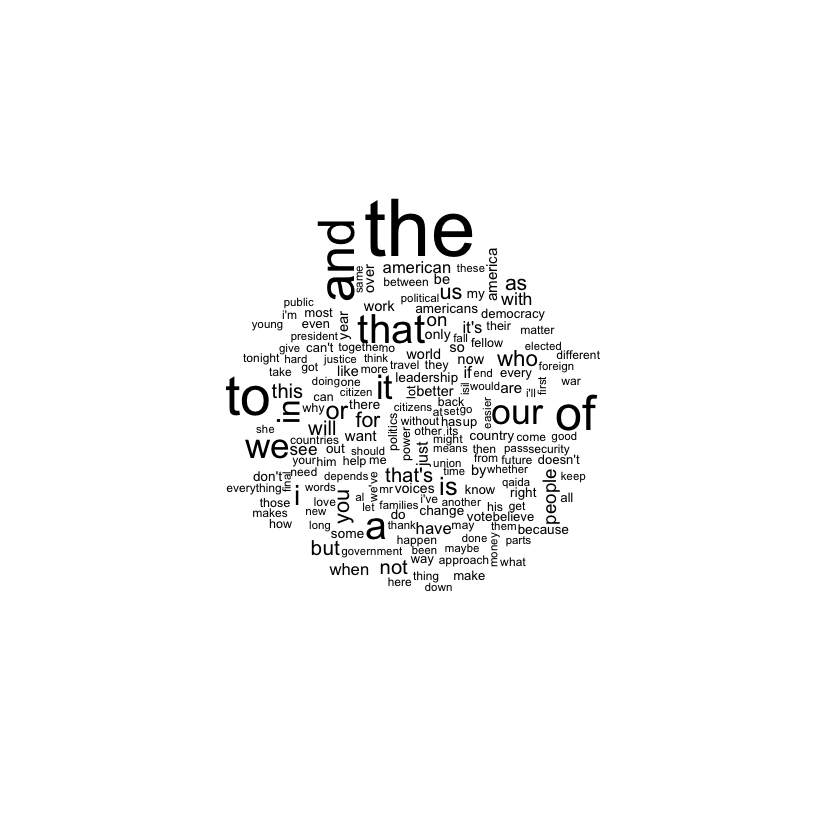

In [25]:
# 3.1 Visualizing the text contained within the DFM(s)

# Dominated by stopwords
textplot_wordcloud(obama_dfm_no_preprocessing, max.words = 200)

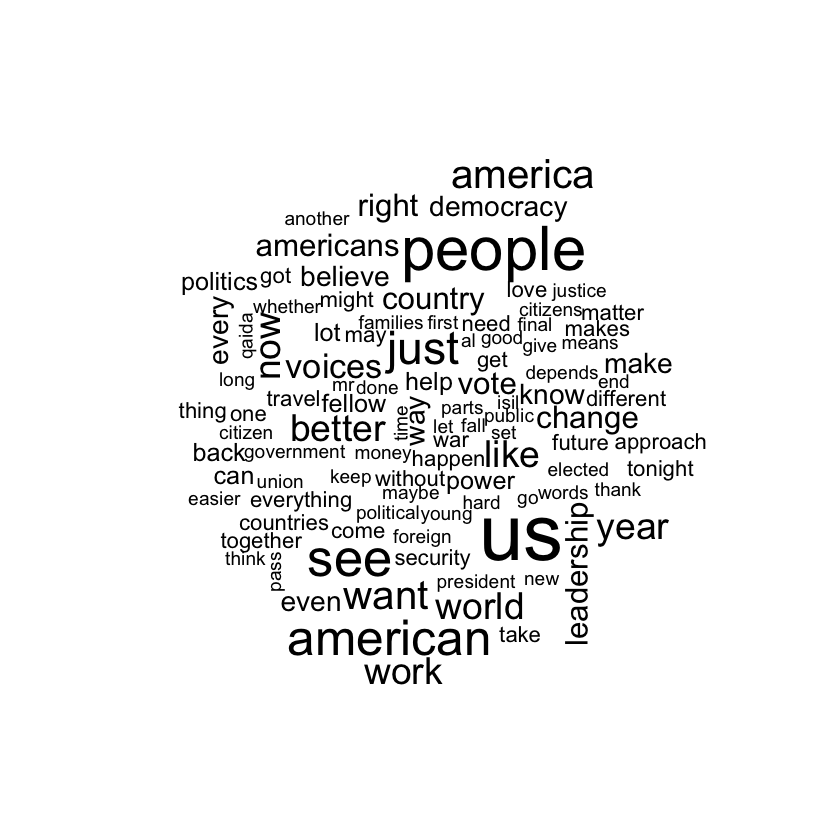

In [26]:
# Stopwords removed
textplot_wordcloud(obama_dfm_pre_processed, max.words = 200)

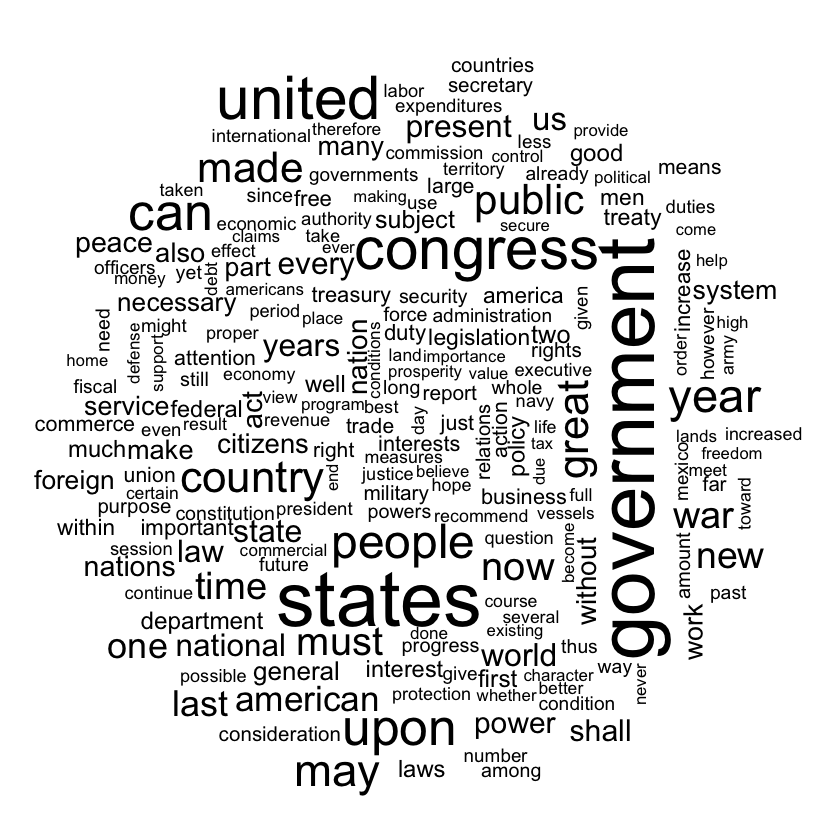

In [27]:
# Over all the SOTUs

textplot_wordcloud(full_dfm, max.words = 200)

In [28]:
# 3.2 tfidf - Frequency weighting

weighted_dfm <- dfm_tfidf(full_dfm) # Uses the absolute frequency of terms in each document
topfeatures(weighted_dfm)

upon     mexico    program    tonight   economic     treaty department 
  385.5964   294.7120   282.0736   253.9098   244.4364   243.8376   239.8999 
      cent       gold   treasury 
  231.9477   229.7900   229.2267

In [29]:
# tfidf - Relative frequency weighting
# Uses feature proportions within documents: divdes each term by 
#the total count of features in the document
normalized <- dfm_tfidf(full_dfm, scheme_tf = "prop") 

topfeatures(normalized)

tonight  americans   economic       help       upon    program      today 
0.14998042 0.10273275 0.08678240 0.08512444 0.08407971 0.08336197 0.07877090 
      jobs     budget      thank 
0.07748341 0.07525084 0.07271848

In [30]:
## 4 Collocations

# bigrams

textstat_collocations(last_speech_text)

collocation,count,count_nested,length,lambda,z
i see,10,0,2,5.365884,8.979335
american people,6,0,2,5.178211,8.460938
if we,7,0,2,4.480927,7.916354
see it,6,0,2,4.376768,7.781431
this year,4,0,2,4.822148,7.041460
not just,4,0,2,4.654669,7.009141
will only,4,0,2,4.960298,6.976824
my fellow,3,0,2,6.602407,6.927453
fellow americans,3,0,2,6.602407,6.927453
as a,7,0,2,3.201570,6.821736


In [31]:
# trigrams

textstat_collocations(last_speech_text, size = 3)

collocation,count,count_nested,length,lambda,z
it in the,6,0,3,3.6423468,2.1707812
see it in,6,0,3,4.6115855,1.8259273
the american people,6,0,3,2.8606235,1.4706169
like us or,2,0,3,3.4578045,1.3412690
like to see,2,0,3,3.1223526,1.1982801
to make it,3,0,3,2.5082243,1.1165911
the way we,2,0,3,2.4250573,1.0890930
is not a,2,0,3,2.3931365,1.0698828
we have to,2,0,3,1.7536562,0.9850769
this is a,2,0,3,1.7860687,0.9360290


In [34]:
## 5 Regular expressions

# regular expressions are a very powerful tool in wrangling text
# not a focus of this class, but something to be aware of

#?regex

s_index <- grep(" s ", texts(data_corpus_sotu))
s_index

[1] 107 184

In [35]:
# this returns every speech that contains " s " -- JUST THE LETTER S BY ITSELF
texts_with_s <- grep(" s ", texts(data_corpus_sotu), value = TRUE)
texts_with_s

Cleveland-1895 
"To the Congress of the United States:\n\nThe present assemblage of the legislative branch of our Government occurs at a time when the interests of our people and the needs of the country give especial prominence to the condition of our foreign relations and the exigencies of our national finances. The reports of the heads of the several administrative Departments of the Government fully and plainly exhibit what has been accomplished within the scope of their respective duties and present such recommendations for the betterment of our country's condition as patriotic and intelligent labor and observation suggest.\n\nI therefore deem my executive duty adequately performed at this time by presenting to the Congress the important phases of our situation as related to our intercourse with foreign nations and a statement of the financial problems which confront us, omitting, except as they are related to these topics, any reference to departmental operations.\n\nI earnestly invite, however, not only the careful consideration but the severely critical scrutiny of the Congress and my fellow-countrymen to the reports concerning these departmental operations. If justly and fairly examined, they will furnish proof of assiduous and painstaking care for the public welfare. I press the recommendations they contain upon the respectful attention of those charged with the duty of legislation, because I believe their adoption would promote the people's good.\n\nBy amendatory tariff legislation in January last the Argentine Republic, recognizing the value of the large market opened to the free importation of its wools under our last tariff act, has admitted certain products of the United States to entry at reduced duties. It is pleasing to note that the efforts we have made to enlarge the exchanges of trade on a sound basis of mutual benefit are in this instance appreciated by the country from which our woolen factories draw their needful supply of raw material.\n\nThe Missions boundary dispute between the Argentine Republic and Brazil, referred to the President of the United States as arbitrator during the term of my predecessor, and which was submitted to me for determination, resulted in an award in favor of Brazil upon the historical and documentary evidence presented, thus ending a long-protracted controversy and again demonstrating the wisdom and desirability of settling international boundary disputes by recourse to friendly arbitration.\n\nNegotiations are progressing for a revival of the United States and Chilean Claims Commission, whose work was abruptly terminated last year by the expiration of the stipulated time within which awards could be made.\n\nThe resumption of specie payments by Chile is a step of great interest and importance both in its direct consequences upon her own welfare and as evincing the ascendency of sound financial principles in one of the most influential of the South American Republics.\n\nThe close of the momentous struggle between China and Japan, while relieving the diplomatic agents of this Government from the delicate duty they undertook at the request of both countries of rendering such service to the subjects of either belligerent within the territorial limits of the other as our neutral position permitted, developed a domestic condition in the Chinese Empire which has caused much anxiety and called for prompt and careful attention. Either as a result of a weak control by the central Government over the provincial administrations, following a diminution of traditional governmental authority under the stress of an overwhelming national disaster, or as a manifestation upon good opportunity of the aversion of the Chinese population to all foreign ways and undertakings, there have occurred in widely separated provinces of China serious outbreaks of the old fanatical spirit against foreigners, which, unchecked by the local authorities, if not actually connived at by them, have culminated in m

In [37]:
# Here we create a vector of documents with " s " removed
texts_without_s <- gsub(" s ", "",  data_corpus_sotu[s_index])
texts_without_s

Cleveland-1895 
"To the Congress of the United States:\n\nThe present assemblage of the legislative branch of our Government occurs at a time when the interests of our people and the needs of the country give especial prominence to the condition of our foreign relations and the exigencies of our national finances. The reports of the heads of the several administrative Departments of the Government fully and plainly exhibit what has been accomplished within the scope of their respective duties and present such recommendations for the betterment of our country's condition as patriotic and intelligent labor and observation suggest.\n\nI therefore deem my executive duty adequately performed at this time by presenting to the Congress the important phases of our situation as related to our intercourse with foreign nations and a statement of the financial problems which confront us, omitting, except as they are related to these topics, any reference to departmental operations.\n\nI earnestly invite, however, not only the careful consideration but the severely critical scrutiny of the Congress and my fellow-countrymen to the reports concerning these departmental operations. If justly and fairly examined, they will furnish proof of assiduous and painstaking care for the public welfare. I press the recommendations they contain upon the respectful attention of those charged with the duty of legislation, because I believe their adoption would promote the people's good.\n\nBy amendatory tariff legislation in January last the Argentine Republic, recognizing the value of the large market opened to the free importation of its wools under our last tariff act, has admitted certain products of the United States to entry at reduced duties. It is pleasing to note that the efforts we have made to enlarge the exchanges of trade on a sound basis of mutual benefit are in this instance appreciated by the country from which our woolen factories draw their needful supply of raw material.\n\nThe Missions boundary dispute between the Argentine Republic and Brazil, referred to the President of the United States as arbitrator during the term of my predecessor, and which was submitted to me for determination, resulted in an award in favor of Brazil upon the historical and documentary evidence presented, thus ending a long-protracted controversy and again demonstrating the wisdom and desirability of settling international boundary disputes by recourse to friendly arbitration.\n\nNegotiations are progressing for a revival of the United States and Chilean Claims Commission, whose work was abruptly terminated last year by the expiration of the stipulated time within which awards could be made.\n\nThe resumption of specie payments by Chile is a step of great interest and importance both in its direct consequences upon her own welfare and as evincing the ascendency of sound financial principles in one of the most influential of the South American Republics.\n\nThe close of the momentous struggle between China and Japan, while relieving the diplomatic agents of this Government from the delicate duty they undertook at the request of both countries of rendering such service to the subjects of either belligerent within the territorial limits of the other as our neutral position permitted, developed a domestic condition in the Chinese Empire which has caused much anxiety and called for prompt and careful attention. Either as a result of a weak control by the central Government over the provincial administrations, following a diminution of traditional governmental authority under the stress of an overwhelming national disaster, or as a manifestation upon good opportunity of the aversion of the Chinese population to all foreign ways and undertakings, there have occurred in widely separated provinces of China serious outbreaks of the old fanatical spirit against foreigners, which, unchecked by the local authorities, if not actually connived at by them, have culminated in m

In [38]:
## 6 Preprocessing choices
library("preText")

preText: Diagnostics to Assess the Effects of Text Preprocessing Decisions
Version 0.6.3 created on 2018-01-12.
copyright (c) 2017, Matthew J. Denny, Penn State University
                    Arthur Spirling, NYU
Type vignette('getting_started_with_preText') to get started.
Development website: https://github.com/matthewjdenny/preText


In [39]:
# Run at home (takes a few minutes to run)
# Example below taken from preText vignette: https://cran.r-project.org/web/packages/preText/vignettes/getting_started_with_preText.html

preprocessed_documents <- factorial_preprocessing(
                          data_corpus_sotu,
                          use_ngrams = FALSE,
                          infrequent_term_threshold = 0.2,
                          verbose = FALSE)
preprocessed_documents

Preprocessing 232 documents 64 different ways...


ERROR while rich displaying an object: Error in FUN(X[[i]], ...): attempt to use zero-length variable name

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_html.list(obj)
9. repr_list_generic(obj, "html", "\t<li>%s</li>\n", "\t<dt>$%s</dt>\n\t\t<dd>%s</dd>\n", 
 .     "<strong>$%s</strong> = %s", "<ol>\n%s</ol>\n", "<dl>\n%s</dl>\n", 
 .     numeric_item = "\t<dt>[[%s]]</dt>\n\t\t<dd>%s</dd>\n", escape_fun = html_escape)


$choices
            removePunctuation removeNumbers lowercase  stem removeStopwords
P-N-L-S-W-I              TRUE          TRUE      TRUE  TRUE            TRUE
N-L-S-W-I               FALSE          TRUE      TRUE  TRUE            TRUE
P-L-S-W-I                TRUE         FALSE      TRUE  TRUE            TRUE
L-S-W-I                 FALSE         FALSE      TRUE  TRUE            TRUE
P-N-S-W-I                TRUE          TRUE     FALSE  TRUE            TRUE
N-S-W-I                 FALSE          TRUE     FALSE  TRUE            TRUE
P-S-W-I                  TRUE         FALSE     FALSE  TRUE            TRUE
S-W-I                   FALSE         FALSE     FALSE  TRUE            TRUE
P-N-L-W-I                TRUE          TRUE      TRUE FALSE            TRUE
N-L-W-I                 FALSE          TRUE      TRUE FALSE            TRUE
P-L-W-I                  TRUE         FALSE      TRUE FALSE            TRUE
L-W-I                   FALSE         FALSE      TRUE FALSE            TRUE
P-N

Generating document distances...
Generating preText Scores...
Generating regression results..
The R^2 for this model is: 0.01875357 
Regression results (negative coefficients imply less risk):
                 Variable Coefficient    SE
1               Intercept       0.115 0.009
2      Remove Punctuation       0.006 0.007
3          Remove Numbers       0.002 0.007
4               Lowercase      -0.001 0.007
5                Stemming       0.001 0.007
6        Remove Stopwords       0.003 0.007
7 Remove Infrequent Terms       0.002 0.007
Complete in: 195.558 seconds...


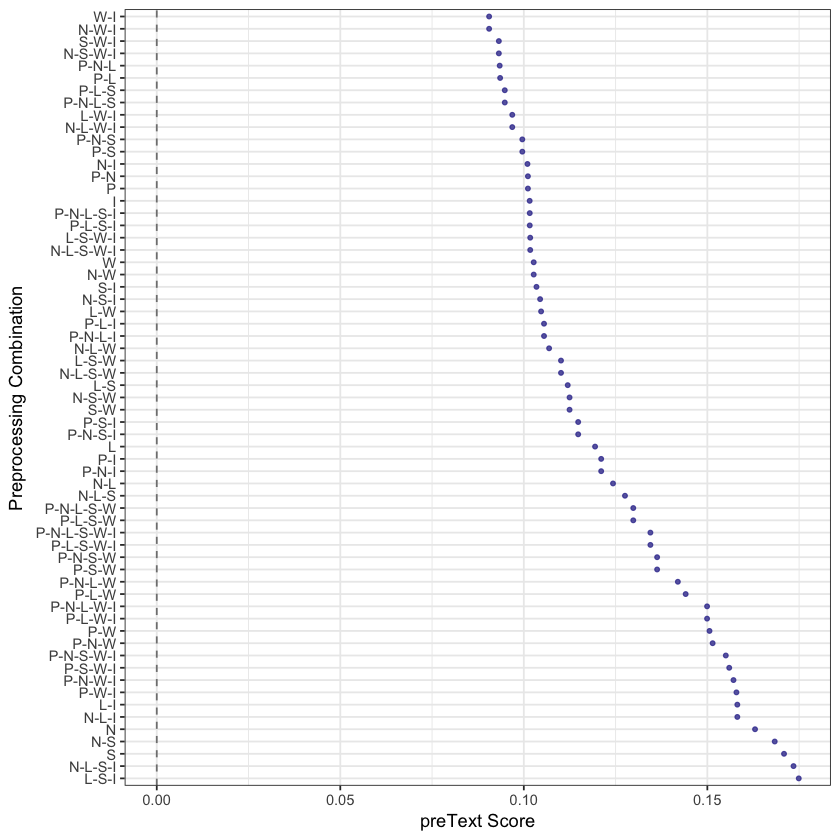

In [40]:
preText_results <- preText(
                            preprocessed_documents,
                            dataset_name = "SOTU Speeches",
                            distance_method = "cosine",
                            num_comparisons = 20,
                            verbose = FALSE)
preText_score_plot(preText_results)